<a href="https://colab.research.google.com/github/Anonymous1846/ALL-Detection-Using-CNN/blob/master/ALL_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing All The Necessary Dependancies.**

In [ ]:
'''
Importing all the necessary dependencies for the Binary Classification model !
In the end we have verified the keras installtion, by printing out the keras version.

keras/tensorflow - for developing and training the DL(CNN) model !
os,random - for selection of the images from the directory !
Each Model is stored in its respective directory along with its history file !
'''
from keras.layers import MaxPooling2D,Conv2D,Dropout,Dense,Flatten,BatchNormalization,MaxPool2D,AveragePooling2D #layers
from keras.applications.imagenet_utils import decode_predictions  
from keras.callbacks import ModelCheckpoint,EarlyStopping 
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.optimizers import RMSprop,Adam                              # for checkpoint calculation and callback   
from keras.applications import ResNet50
from sklearn.metrics import roc_auc_score    
from sklearn.metrics import roc_curve    
from sklearn.metrics import auc 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report                                
from keras.preprocessing import image
from keras.applications import VGG19
from keras.applications import VGG16
from keras.models import Sequential
import matplotlib.pyplot as plt                                                   # for plotting 
import tensorflow as tf
from cv2 import imread
import numpy as np
import pickle                                                                    #for pickling the history dictionary !
import keras
import os 

# reading the image via  a path 
#causes an error if the keras installtion didn't went well !
print(keras.__version__)

2.4.3


# **Loading the Dataset(i.e Cancer cell images).**

In [1]:
'''
This is an optional block of code which can be executed if the 
google drive needs to be mounted on different account
'''

from google.colab import drive
drive.mount('/content/drive',force_remount=False)

Mounted at /content/drive


In [ ]:
'''
The Images required for the training, validation, and testing is found in the /Architecture Datasets directory !
Architecture Datasets 
|
|
|
 ---- Training(80 %)
      |
      |
      ----Normal 
      |
      ----Blasts
|
|
---- Validation (10 %)
      |
      |
      ----Normal 
      |
      ----Blasts
|
|
---- Testing (10 %)
      |
      |
      ----Normal 
      |
      ----Blasts

      The images/dataset is divided into 80% training, 10% testing and 10% validation
'''
training_data_path    = "/content/drive/MyDrive/Architecture Datasets/Training"
validation_data_path  = "/content/drive/MyDrive/Architecture Datasets/Validation"
testing_data_path     = "/content/drive/MyDrive/Architecture Datasets/Testing"

print(f'The Training Images Path   :  {training_data_path}')
print(f'The Validation Images Path :  {validation_data_path}')
print(f'The Testing Images Path    :  {testing_data_path}')


The Training Images Path   :  /content/drive/MyDrive/Architecture Datasets/Training
The Validation Images Path :  /content/drive/MyDrive/Architecture Datasets/Validation
The Testing Images Path    :  /content/drive/MyDrive/Architecture Datasets/Testing


# **Image Preprocessing Custom**

In [ ]:
'''
ALL-IDB1 and ALL IDB2 both contains roughly 334 images, but after spiltting of the images,
the size becomes significantly low, and this leads significant amount of overfitting.
So, inorder to solve the problem of overfitting, we have to apply data augmentation 
to increase the number of images, from the previous existing images !

Note: This block of code should only be executed if and only if the model used is AlexNet or Custom !
'''

training_images_preprocessed = ImageDataGenerator(rescale=1./255,
                                                  rotation_range=40,
                                                  width_shift_range=0.2,
                                                  height_shift_range=0.2,
                                                  shear_range=0.2,
                                                  zoom_range=0.2,
                                                  horizontal_flip=True,
                                                  vertical_flip=True,
                                                  fill_mode='nearest')

validate_images_preprocessed = ImageDataGenerator(rescale=1./255)

# **Preprocessing Via Pre-Process Function (For VGG Pre-Trained Models)**

In [ ]:
'''
Important Note : If you're running the custom model please run the above function only.
This block is only applicable to Transfer Learning  VGG 19 !
'''
from keras.applications.vgg19 import preprocess_input 
training_images_preprocessed=ImageDataGenerator(preprocessing_function=preprocess_input)

validate_images_preprocessed = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
'''
Important Note : If you're running the custom model please run the above function only.
This block is only applicable to Transfer Learning  VGG 16 !
'''
from keras.applications.vgg16 import preprocess_input 
training_images_preprocessed=ImageDataGenerator(preprocessing_function=preprocess_input)

validate_images_preprocessed = ImageDataGenerator(preprocessing_function=preprocess_input)

# **Process Input For ResNet50**

In [ ]:
'''
Important Note : If you're running the custom model please run the above function only.
This block is only applicable to Transfer Learning  ResNet50 !
'''
from keras.applications.resnet50 import preprocess_input
training_images_preprocessed=ImageDataGenerator(preprocessing_function=preprocess_input)

validate_images_preprocessed = ImageDataGenerator(preprocessing_function=preprocess_input)

# **Applying the Image Augmentation to Training and Validation Set !**

In [ ]:
#the below dict is for the image diemension info only and is used for applying the augemntaion to other datasets !

model_dict = {'AlexNet':(227,227),'Binary':(300,300),'VGG':(224,224),'ResNet':(224,224)}
architecture='ResNet'             # actual flag for the image diemensions !

In [ ]:
'''
The function augments the data, according to the processing mode.
The processing mode has defined earlier seperately for training and validation set !

params: training/validation directory,the processing mode(different for training and validation dataset), and flag for model !

return: augmented data 
'''

def apply_augmentation(data_directory,processing_mode,flag):
  
  data_gen = processing_mode.flow_from_directory(
  data_directory,                               # the directory as provided to the function as an arguement !
  target_size = model_dict[flag],               # 300x 300 pixels for custom,224 for VGG, and 227 for AlexNet 
  batch_size = 128,                             # Number of Images Excepted at Iteration !
  class_mode='binary')
  print(f'Image Shape : {model_dict[flag]}')
  return data_gen


training_images_datagen = apply_augmentation(training_data_path,            #path to training dir
                                             training_images_preprocessed,  #mode of processing
                                             architecture)                  #architecture

valid_images_datagen = apply_augmentation(validation_data_path,             #validation dir
                                          validate_images_preprocessed,
                                          architecture)

test_images_datagen = apply_augmentation(testing_data_path,                 #testing dir !
                                         validate_images_preprocessed,
                                         architecture)

print(training_images_datagen.class_indices) # class indices refer to the numerical equivalent whether they are cancerours or not !


Found 268 images belonging to 2 classes.
Image Shape : (224, 224)
Found 33 images belonging to 2 classes.
Image Shape : (224, 224)
Found 33 images belonging to 2 classes.
Image Shape : (224, 224)
{'Blasts': 0, 'Normal': 1}


#**Using the mean pixel we have calculated the number of features !**

In [ ]:
sample_image0=imread('/content/drive/MyDrive/Architecture Datasets/Training/Blasts/Im031_1.jpg')
print("The diemensions of the cancer cell: {}".format(sample_image0.shape))
feature_matrix0 = np.zeros((sample_image0.shape[0], sample_image0.shape[1])) # for cancer cell

'''
The function will calculate the mean pixels values which are essential in understanding the number of possible 
values/ features in the image !

params: fetaure matrix and image

return: None
'''
def show_features(feature_matrix,img):
  for i in range(1,img.shape[0]):
    for j in range(1,img.shape[1]):
        feature_matrix[i][j] = ((int(img[i,j,0]) + int(img[i,j,1]) + int(img[i,j,2]))/3) # mean for three channels !

  features = np.reshape(feature_matrix, (img.shape[0]*img.shape[1])) 
  print("The mean pixels values for the cancer cells: {}".format(features.shape[0]))

show_features(feature_matrix0,sample_image0) # for cancer cell 


The diemensions of the cancer cell: (1368, 1712, 3)
The mean pixels values for the cancer cells: 2342016


# **Representation of Images.**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


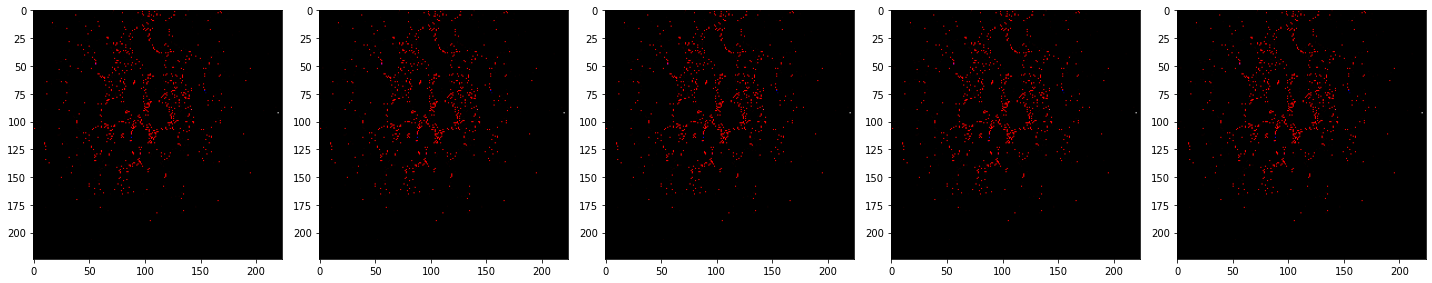

In [ ]:
'''
The function is used to plot the augmented figures of the images, for visual demonstartion !

params: image object
return: 5 plotted images
'''
def plot(image):
  fig,axes=plt.subplots(1,5,figsize=(20,20))# 20 x 20 images 
  axes=axes.flatten()
  for imag,axis in zip(image,axes):
    #the zip function takes two params(iteratables and combines then to form a list of tuples !)
    axis.imshow(imag)
  plt.tight_layout()
  plt.show()

training_images_datagen.class_indices
sample_images=[training_images_datagen[0][0][0] for i in range(5)]
plot(sample_images)

# **Binary CNN Classifier 0!**

In [ ]:
'''
The CNN model is used to predict whether the given data image is cancerous or not,
it contains 5 convolution and corresponding number of maxpooling layers.
RelU function is added to each layer so that it can introduce non-linearity and 
avoid the negative values !
'''
the_binary_cnn_model0=Sequential([
                                    Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)), # relu function is used to negate the negative values from the models, replace them with zeros !
                                    MaxPooling2D(2, 2),
                                    Conv2D(32, (3,3), activation='relu'),# The second convolution
                                    MaxPooling2D(2,2),                                    
                                    Conv2D(64, (3,3), activation='relu'),# The third convolution
                                    MaxPooling2D(2,2),                                   
                                    Conv2D(64, (3,3), activation='relu'), # The fourth convolution
                                    MaxPooling2D(2,2),                                   
                                    Conv2D(64, (3,3), activation='relu'), # The fifth convolution
                                    MaxPooling2D(2,2),                                   
                                    Flatten(),                            # Flatten the  results to feed into a DNN                                    
                                    Dense(512, activation='relu'),        # 512 neuron hidden layer
                                    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('normal') and 0 for the other 'cancer'
                                    Dense(1, activation='sigmoid') # the output will be the range of -1 and 1(graph will be S shaped !)
                                        ])

the_binary_cnn_model0.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 33, 33, 64)       

# **Binary Classifier Based On AlexNet Architecture**

In [ ]:
'''
Implementation of the AlexNet architecture, which is an common architecture of the CNN model
The AlexNet Alrchitecture has been modified since, the original one is capable of classifiying
upto 1000 tensors, and requires more computational power !
'''
alexnet_model =Sequential([
                    Conv2D(96, (11, 11), strides=(4,4), activation='relu', input_shape=(227, 227, 3)),
                    BatchNormalization(),
                    MaxPooling2D((3, 3),strides=(2,2)),
                    Conv2D(256, (5, 5),padding='same', activation='relu'),                    
                    MaxPooling2D((3, 3),strides=(2, 2)),
                    Conv2D(384, (3, 3), padding='same',activation='relu'),
                    Conv2D(384, (3, 3), padding='same',activation='relu'),
                    Conv2D(256, (3, 3), padding='same',activation='relu'),
                    MaxPooling2D((3, 3),strides=(2, 2)),
                    Flatten(),
                    Dense(4096, activation='relu'),# two sense layers with 4096 nuerons each                 
                    Dropout(0.5),
                    Dense(4096, activation='relu'),                
                    Dropout(0.5),
                    Dense(1, activation='sigmoid')# sigmoid used to binary other wise softmax will be used for probabilitic classification!
                                                  #Padding calculation = input_size + 2 * padding_size-(filter_size-1)
])
print(alexnet_model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization_18 (Batc (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 13, 13, 384)     

# **Binary Classifier Based On VGG 19**

In [ ]:
'''
The VGG 19 is a part of VGG CNN model, which has 138 million trainable params !
The base layers of the model has been set to trainable while the top ones were untrained for 
fine tuning !
'''

vgg_net19 =  VGG19(
              weights='imagenet',
              include_top=False,
              input_shape=(224, 224, 3)
                    )

trainable = False
for layer in vgg_net19.layers:
    if layer.name == 'block5_conv1':
        trainable = True
    if trainable:
        layer.trainable = True
    else:
        layer.trainable = False

vggnet_19model = Sequential(
                          [vgg_net19,
                          Flatten(),
                          Dropout(0.3),
                          Dense(128,activation='relu'),
                          Dense(1,activation='sigmoid')
                          ])

vggnet_19model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 26,447,425
Trainable params: 15,862,273
Non-trainable params: 10,585,152
_________________________________________________________________


# **Binary Classifier Based On VGG 16**

In [ ]:
vgg_net16 =  VGG16(
              weights='imagenet',
              include_top=False,
              input_shape=(224, 224, 3)
                    )

trainable = False
for layer in vgg_net16.layers:
    if layer.name == 'block5_conv1':
        trainable = True
    if trainable:
        layer.trainable = True
    else:
        layer.trainable = False

vggnet_16model = Sequential(
                          [vgg_net16,
                          Flatten(),
                          Dropout(0.5),
                          Dense(256,activation='relu'),
                          Dense(1,activation='sigmoid')
                          ])

vggnet_16model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 21,137,729
Trainable params: 13,502,465
Non-trainable params: 7,635,264
_________________________________________________________________


# **Model Based On ResNet**

In [ ]:
'''
The transfer learning mechanism applied to ResNet 50, which is a Residual network
It has 22 million params !
Last layers is set to trainable , from 165 onwards !
'''

resnet = ResNet50(
    include_top=False,
    weights="imagenet",
    
    input_shape=(224,224,3),
)
for layer in resnet.layers[:165]:
   layer.trainable = False
for layer in resnet.layers[165:]:
   layer.trainable = True
resnet_model = Sequential(
                          [resnet,                         
                          Flatten(),
                          Dropout(0.5),
                          Dense(256,activation='relu'),
                          Dropout(0.5),
                          Dense(1,activation='sigmoid')
                          ])
resnet_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_6 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 100352)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               25690368  
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 257       
Total params: 49,278,337
Trainable params: 30,156,289
Non-trainable params: 19,122,048
_________________________________

# **Compile the model**

In [ ]:
'''
Compiling the model using the loss function binary crossentropy and RMSProp !

return : None

params : model object 
'''
def compile_model(model):
  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(lr=1e-5), #optionally use the Adam with learning rate 0.001 - 1e-5
                metrics=['accuracy'])
compile_model(resnet_model)


# **Validation and CallBack Lists**

In [ ]:
'''
The below callback list is used to moniter the validation accuracy, and the save the best version of the
CNN model. The paths has been specified for later use !

The Classifier model and the history file are saved in the Binary Classifier Models directory, in the format:

Model_Name_Directory
                | 
                |
                 ---- Model_File.h5
                 ---- Model_History.pickle
                 -----Model_Test_Acc.pickle
'''

model_path    = '/content/drive/MyDrive/Binary Classifier Models /Binary Classifier Model 0/Binary_Classifier_Model.h5'
alexnet_path  = '/content/drive/MyDrive/Binary Classifier Models /AlexNet Classifier/AlexNet_Classifier.h5'
vgg19_path    = '/content/drive/MyDrive/Binary Classifier Models /VGG 19/VGG_19v1.h5' 
vgg16_path    = '/content/drive/MyDrive/Binary Classifier Models /VGG 16/VGG_16.h5'
resnet_path   = '/content/drive/MyDrive/Binary Classifier Models /ResNet/ResNet.h5'

In [ ]:
'''
Early stopping is a mechanism, which allows to moniter a value, specially the val_loss, and stop the 
training, at a particular patience level, to avoid overfitting !
'''

early_call_back = EarlyStopping(monitor="val_loss",patience=4,verbose=1,mode="auto",restore_best_weights=True)

In [ ]:
callback_checkpoint=ModelCheckpoint(resnet_path,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
callback_checkpoint_list=[callback_checkpoint,early_call_back]#can remove the early stopping if needed !

# **Training the datset based on given model !**

In [ ]:
'''
The below function takes in an arguement, which is the model to be trained and it trains the dataset with the specified model
epochs:100

Params: model object

Return the trained object
'''

def train_the_model(model):
  the_final_train = model.fit(
                      training_images_datagen,
                      callbacks       = callback_checkpoint_list,
                      validation_data = valid_images_datagen,
                      steps_per_epoch = 3, #the steps per epoch is set to 2, but cannot be set to more than 3(because of error !) 
                      epochs          = 30,#100 for regular !
                      verbose         = 2,
                    )
  return the_final_train


trained_model=train_the_model(resnet_model)

# **Saving History Pickle File !**

In [ ]:
binary_class_pickle  = '/content/drive/MyDrive/Binary Classifier Models /Binary Classifier Model 0/BinaryClass.pickle'
alexnet_pickle       = '/content/drive/MyDrive/Binary Classifier Models /AlexNet Classifier/AlexNet.pickle' 
vgg19_pickle         = '/content/drive/MyDrive/Binary Classifier Models /VGG 19/VGG19v1.pickle'
vgg16_pickle         = '/content/drive/MyDrive/Binary Classifier Models /VGG 16/VGG16.pickle'
resnet_pickle        = '/content/drive/MyDrive/Binary Classifier Models /ResNet/ResNetv1.pickle'

In [ ]:
'''
The model cannot path cannot be directly used to retrieve the history thats
why we are saving the respective model history to a pickle file 

return : None

params : model_history and path of pickle file 
'''

def save_file(pickle_dir,model_history):
  with open(pickle_dir,'wb') as binary_pickle:
    binary_pickle.write(pickle.dumps(model_history)) #dumping to pickle before writing to pickle file !
    print(f'History Saved to {pickle_dir}')

save_file(resnet_pickle,trained_model.history) #the path of the model history pickle and the current model history !

History Saved to /content/drive/MyDrive/Binary Classifier Models /ResNet/ResNetv1.pickle


# **Accuracy and Loss Graph !**

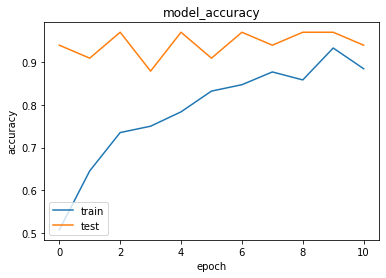

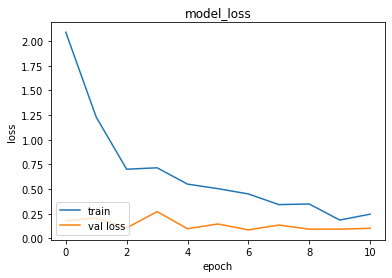

88.43283653259277
93.9393937587738


In [ ]:
with open(resnet_pickle,'rb') as model_history: #opening the pickle file which contains the dictionary !
  model_history_dict=model_history.read()
'''
The accuracy and the losses at each iteration/epoch is evaluated in the graph below
matplotlib is used for plotting.

return:None

params:model history path
'''
def plot_metrics(model):
  model=pickle.loads(model)
  plt.plot(model['accuracy'])
  plt.plot(model['val_accuracy'])
  plt.title('model_accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','test'],loc='lower left')
  plt.show()

  plt.plot(model['loss'])
  plt.plot(model['val_loss'])
  plt.title('model_loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','val loss'],loc='lower left')
  plt.show()


plot_metrics(model_history_dict)
print(pickle.loads(model_history_dict)['accuracy'][-1]*100)
print(pickle.loads(model_history_dict)['val_accuracy'][-1]*100)

# **ROC Curve Graph and Model Analytics**

In [ ]:
blasts = testing_data_path+'/Blasts'
normal = testing_data_path+'/Normal'
test_blasts = [ os.path.join(blasts,i) for i in os.listdir(blasts)]
test_normal = [ os.path.join(normal,i) for i in os.listdir(normal)]
tests = test_blasts+test_normal
print(f'{len(tests)} Test Images Found !')

33 Test Images Found !


In [ ]:
def get_preds(model,image_path):
  size = (224,224)      #default set to 224 x 224 for simplicity !
  if model == 'AlexNet':
    model,size = alexnet_path,model_dict['AlexNet']
  elif model == 'Binary':
    model,size = model_path,model_dict['Binary']
  elif model == 'VGG 16':
    model    = vgg16_path
  elif model == 'VGG 19':
    model = vgg19_path
  elif model == 'ResNet':
    model = resnet_path
  else:
    raise Exception('Invalid Model Arguments !')             #exception thrown for invalid path !

  model = keras.models.load_model(model)                     #loading the model.h5 from the drive !
  img   = image.load_img(image_path, target_size=size)       # loading the image in 300x300 diemensions(227x227x3 for AlexNet)
  img   = image.img_to_array(img)
  img   = np.expand_dims(img, axis=0)                        #expanding along one axis 
  result_vector = model.predict(img).round(1)
  return result_vector[0]

In [ ]:
y_preds = [get_preds('ResNet',x) for x in tests]
y_true = test_images_datagen.classes
class_labels = list(test_images_datagen.class_indices.keys())

In [ ]:
def plot_roc(y_true,y_preds):
  false_ptr, true_ptr, nn_thresholds_keras = roc_curve(y_true, y_preds)
  plt.figure(1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(false_ptr,true_ptr)
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.legend(['','ROC'],loc='lower right')
  plt.show()
  auc_score=roc_auc_score(y_true,y_preds)
  print(f'AUC Score : {round(auc_score,3)}')  

No handles with labels found to put in legend.


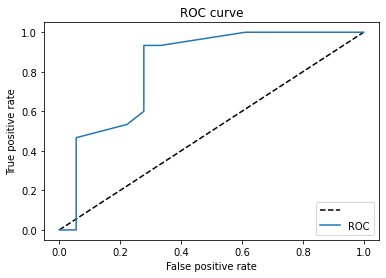

AUC Score : 0.824


In [ ]:
plot_roc(y_true,y_preds)

#**Testing for Cancer vs Normal**

In [ ]:
'''
The final module of the system which basically predicts whether given cell is a blast or normal cell,
based on the image and the prediction model file ! First of all, the model decides which model to call based
on the falg you give, then the size is set to 300x300,227x277 respectively for Binary and AlexNet and the
default size is 224x244.

return: Blast or Not 
 
params: path to the model and the path to the image !
'''

def check_for_cancer(model,image_path):                 
  result_vector = get_preds(model,image_path)                   
  print(result_vector)
  return "Cancerous" if result_vector[0] <0.5 else "Normal"


model  = 'VGG 19'
print(f'Prediction Based on the {model} Classifier !')
print(check_for_cancer(model,'/content/drive/MyDrive/Architecture Datasets/Testing/Blasts/Im006_1.jpg'))
print(check_for_cancer(model,'/content/drive/MyDrive/Architecture Datasets/Testing/Normal/Im066_0.jpg'))

Prediction Based on the VGG 19 Classifier !
[0.2]
Cancerous
[0.6]
Normal


In [ ]:
bin_test    = '/content/drive/MyDrive/Binary Classifier Models /Binary Classifier Model 0/binary_acc.pickle'
alexnet_test= '/content/drive/MyDrive/Binary Classifier Models /AlexNet Classifier/alexnet_acc.pickle'
vgg16_test  = '/content/drive/MyDrive/Binary Classifier Models /VGG 16/vgg16_acc.pickle'
vgg19_test  = '/content/drive/MyDrive/Binary Classifier Models /VGG 19/vgg19v1_acc.pickle'
resnet_test = '/content/drive/MyDrive/Binary Classifier Models /ResNet/ResNet_acc.pickle'

# **Metrics Analysis**

In [ ]:
'''
The optional block of code only run if the accuracy is to be calculated !

return: None

params: model_path, test_generator, pickle_file path

'''

def get_accuracy(model_path:str,test_datagen,pickle_file:str)->None:
  model = keras.models.load_model(model_path)
  loss,accuracy = model.evaluate(test_datagen,batch_size = 128)
  with open(pickle_file,'wb') as binary_pickle:
    binary_pickle.write(pickle.dumps((loss,accuracy))) #dumping to pickle before writing to pickle file !
    print(f'Accuracy Saved to {pickle_file}')

get_accuracy(resnet_path,test_images_datagen,resnet_test)

In [ ]:
print(pickle.loads(open(resnet_test,'rb').read())[1]*100)

93.9393937587738


# **Run Flask App**

In [2]:
!pip install flask_ngrok  #optional step to install the ngrok for flask !

In [4]:
!python /content/drive/MyDrive/Web-App/app.py

2021-05-22 08:38:30.622697: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
 * Serving Flask app "app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Running on http://595b75f47529.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040
127.0.0.1 - - [22/May/2021 08:38:36] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2021 08:38:37] "GET /static/assets/bootstrap/css/bootstrap.min.css HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2021 08:38:38] "GET /content/drive/MyDrive/Web-App/static/images/favicon.ico HTTP/1.1" 404 -
^C
